In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import urllib.request

url = 'http://ergast.com/downloads/f1db_csv.zip'
filehandle, _ = urllib.request.urlretrieve(url)
zf = zipfile.ZipFile(filehandle, 'r')

results_df = pd.read_csv(zf.open('results.csv'))
drivers_df = pd.read_csv(zf.open('drivers.csv'))
lap_times_df = pd.read_csv(zf.open('lap_times.csv'))
races_df = pd.read_csv(zf.open('races.csv'))
pit_stops_df = pd.read_csv(zf.open('pit_stops.csv'))

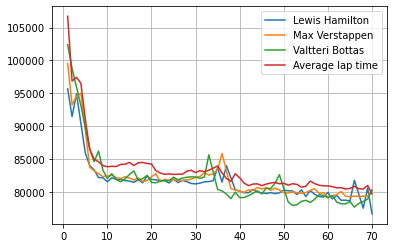

In [2]:
raceId = lap_times_df.raceId.drop_duplicates().iloc[-4]
race_df = lap_times_df[lap_times_df["raceId"] == raceId].copy()
pit_stop_df = pit_stops_df[pit_stops_df.raceId == raceId]

for driverId in pit_stop_df.driverId.drop_duplicates():
    for lap in pit_stop_df[pit_stop_df.driverId == driverId].lap:
        race_df.loc[(race_df.driverId == driverId) & (race_df.lap == lap + 1),'milliseconds'] = np.nan
        mean_value = race_df.loc[(race_df.driverId == driverId) & (race_df.lap.isin([lap, lap + 1, lap + 2]))].milliseconds.mean()
        race_df.loc[(race_df.driverId == driverId) & (race_df.lap == lap + 1),'milliseconds'] = mean_value

for driverId in results_df[results_df.raceId == raceId].driverId.iloc[:3]:
    driver_info = drivers_df[drivers_df["driverId"] == driverId]
    driver_name = driver_info["forename"] + ' ' + driver_info["surname"]
    plt.plot(race_df.lap.drop_duplicates(),
             race_df[race_df.driverId == driverId].milliseconds,
             label = driver_name.iloc[0])
    
plt.plot(race_df.lap.drop_duplicates(),
         [race_df[race_df.lap == lap].milliseconds.mean() for lap in race_df.lap.drop_duplicates()],
         label = 'Average lap time')

plt.legend()
plt.grid()

plt.show()